# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()


3

### Compléter le code et commenter

In [4]:
A=0 #position
NA=0 #la valeur du dé aprés le lancement
N=10 # la position de la cible 
c=0 # compteur
while (A<N) :
    NA=Roll()
    if NA==6 and A==0:
        A=A+1
        c=c+1
        print(NA,A,c)
    elif A>0 and NA+A<N:
        A=A+NA
        c=c+1
        print(NA,A,c)
    elif NA+A==N:
        c=c+1
        A=A+NA
        print(NA,A,c)
        break
    else:
        c=c+1
        print(NA,A,c)
        

5 0 1
4 0 2
3 0 3
5 0 4
3 0 5
1 0 6
2 0 7
6 1 8
4 5 9
6 5 10
4 9 11
1 10 12


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [9]:
def sim(S):
    A=0
    NA=0
    c=0
    while (A<S) :
        NA=Roll()
        if NA==6 and A==0:
            A=A+1
            c=c+1
        elif A>0 and NA+A<S:
            A=A+NA
            c=c+1
        elif NA+A==S:
            c=c+1
            A=A+NA
            break
        else:
            c=c+1
    
    return c
    

In [10]:
sim(20)

31

### Simulation de $10^5$  scénario 

In [11]:
Freq=np.fromiter((sim(20) for i in range(1000)),dtype=int)

In [13]:
ESP=Freq.sum()/1000
ESP

16.612

In [14]:
x=list(range(10,20))

In [15]:
y=[np.fromiter((sim(u) for i in range(1000)),dtype=int).sum()/1000 for u in x]

In [16]:
y

[13.164,
 13.905,
 13.825,
 14.118,
 14.562,
 14.929,
 15.129,
 15.062,
 16.036,
 16.112]

In [17]:
import matplotlib.pyplot as plt

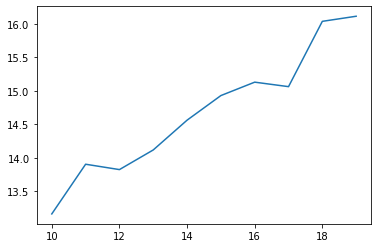

In [18]:
plt.plot(x,y)

In [17]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [18]:
slope

0.28871527272727254

In [19]:
intercept


10.443562545454547